# Deep Learning with Keras and TensorFlow

### Installer les packages

In [1]:
#!pip install keras

In [2]:
#!pip install tensorflow

## Utiliser Keras depuis TensorFlow

### Multi Layer Perceptron (MLP) 

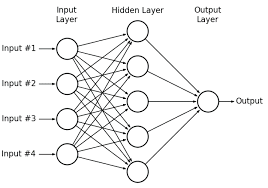

In [3]:
from IPython.display import Image
Image("C:/Users/scorde/Desktop/Data_Science/Projets/Interne/Deep Learning/Images/mlp.png", width=400, height=400)

### Importation des librairies 

In [4]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, softmax

C:\Users\scorde\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Importation des données 

In [5]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


On dispose de 70 000 images labelisées de chiffres (0-9) écrits à la main (base de données MNIST). Chaque image est composée de 784 pixels (28x28). L'intensité d'un pixel varie entre 0 et 255 (échelle de gris).
Notre échantillon d'apprentissage se compose de 60 000 images tandis que notre notre échantillon de test se compose de 10 000 images.

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
print(x_train.max())
print(x_train.min())
print(x_train.mean())

255
0
33.318421449829934


### Normalisation des images 

In [9]:
x_train = normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = normalize(x_test, axis=1)  # scales data between 0 and 1

In [10]:
print(x_train.max())
print(x_train.min())
print(x_train.mean())

1.0
0.0
0.053848805089292476


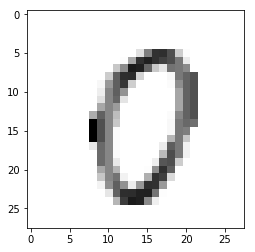

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000], cmap=plt.cm.gray_r)
plt.show()

# Machine Learning 

### Multi Layer Perceptron 

In [12]:
model = Sequential()  # a basic feed-forward model

model.add(Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dense(units=128, activation=relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dense(units=128, activation=relu))  # a simple fully-connected layer, 128 units, relu activation

model.add(Dense(units=10, activation=softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [40]:
print(y_train[1])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how we will calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

In [14]:
model.fit(x_train, y_train)  # train the model

Epoch 1/1
60000/60000 [==============================] - 7s 117us/step - loss: 0.2591 - acc: 0.9256


In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 1s 55us/step
0.1413458367586136
0.9524


In [16]:
predictions = model.predict_classes(x_test)

In [17]:
print(predictions)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [18]:
from sklearn.metrics import accuracy_score
                                           
accuracy_score(y_test, predictions)

0.9524

In [21]:
import numpy as np
np.mean(y_test == predictions)

0.9524

In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[ 959,    0,    0,    0,    1,    1,   11,    1,    4,    3],
       [   0, 1113,    3,    0,    1,    0,    3,    2,   13,    0],
       [   8,    4,  967,    5,   14,    2,    7,   14,   11,    0],
       [   0,    1,    8,  950,    4,    8,    4,    8,   10,   17],
       [   0,    0,    0,    0,  946,    0,    8,    0,    1,   27],
       [   5,    0,    1,   17,    2,  818,   20,    5,   12,   12],
       [   7,    2,    0,    0,    8,    2,  936,    0,    3,    0],
       [   1,    5,   10,    5,    8,    0,    0,  958,    0,   41],
       [   3,    1,    2,    8,   13,    3,   10,    5,  910,   19],
       [   5,    6,    1,    7,   12,    0,    1,    2,    8,  967]],
      dtype=int64)

In [23]:
classes = np.arange(0, 10)

classes = [ str(x) for x in classes]

classes

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 8s 178us/step - loss: 0.1209 - acc: 0.9616 - val_loss: 0.1119 - val_acc: 0.9657
Epoch 2/10
45000/45000 [==============================] - 8s 188us/step - loss: 0.0761 - acc: 0.9762 - val_loss: 0.1022 - val_acc: 0.9689
Epoch 3/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.0560 - acc: 0.9817 - val_loss: 0.0984 - val_acc: 0.9713
Epoch 4/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.0448 - acc: 0.9858 - val_loss: 0.1120 - val_acc: 0.9677
Epoch 5/10
45000/45000 [==============================] - 9s 195us/step - loss: 0.0335 - acc: 0.9891 - val_loss: 0.1111 - val_acc: 0.9719
Epoch 6/10
45000/45000 [==============================] - 10s 233us/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.1193 - val_acc: 0.9706
Epoch 7/10
45000/45000 [==============================] - 9s 202us/step - loss: 0.0219 - acc: 0.9926 - val_loss: 0.1389 -

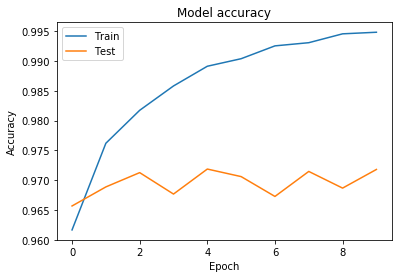

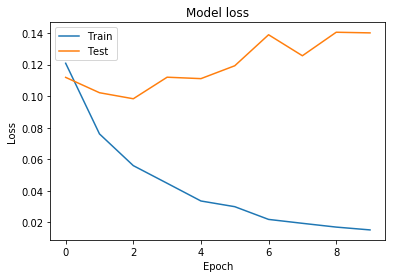

In [24]:
import matplotlib.pyplot as plt

history = model.fit(x_train, y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Confusion matrix, without normalization
[[ 959    0    0    0    1    1   11    1    4    3]
 [   0 1113    3    0    1    0    3    2   13    0]
 [   8    4  967    5   14    2    7   14   11    0]
 [   0    1    8  950    4    8    4    8   10   17]
 [   0    0    0    0  946    0    8    0    1   27]
 [   5    0    1   17    2  818   20    5   12   12]
 [   7    2    0    0    8    2  936    0    3    0]
 [   1    5   10    5    8    0    0  958    0   41]
 [   3    1    2    8   13    3   10    5  910   19]
 [   5    6    1    7   12    0    1    2    8  967]]
Normalized confusion matrix
[[9.78571429e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.02040816e-03 1.02040816e-03 1.12244898e-02 1.02040816e-03
  4.08163265e-03 3.06122449e-03]
 [0.00000000e+00 9.80616740e-01 2.64317181e-03 0.00000000e+00
  8.81057269e-04 0.00000000e+00 2.64317181e-03 1.76211454e-03
  1.14537445e-02 0.00000000e+00]
 [7.75193798e-03 3.87596899e-03 9.37015504e-01 4.84496124e-03
  1.35658915e-02 1.937984

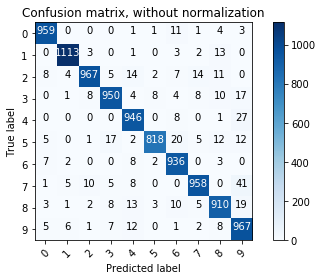

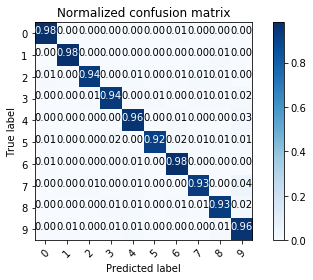

In [25]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions), classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, predictions), classes=classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [26]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 36us/step


[0.13992077426549548, 0.9713]

## Utiliser Keras avec TensorFlow comme backend 

### Convolutionnal Neural Networks (CNN) 

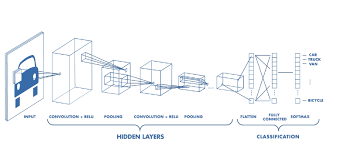

In [27]:
from IPython.display import Image
Image("C:/Users/scorde/Desktop/Data_Science/Projets/Interne/Deep Learning/Images/cnn.png", width=400, height=400)

### Importation des librairies 

In [3]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

C:\Users\scorde\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importation des données 

In [46]:
# Generate dummy data
np.random.seed(42)
x_train = np.random.random((100, 100, 100))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)
x_test = np.random.random((20, 100, 100, 3))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(20, 1)), num_classes=10)

In [47]:
nombre = np.random.randint(10, size=(100, 1))
print(nombre.shape)

(100, 1)


In [48]:
print(y_train.shape)

(100, 10)


In [49]:
print(x_train.shape)

(100, 100, 100)


In [52]:
x_train_reshaped = x_train.reshape((100, 100, 100, 1))

In [53]:
x_train_reshaped.shape

(100, 100, 100, 1)

### Machine Learning 

### Convolutionnal Neural Network (CNN)

In [54]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Optimisation de la descente de gradient

In [55]:
sgd = SGD(lr=0.01, 
          decay=1e-6,
          momentum=0.9, 
          nesterov=True)

### Compilation du modèle 

In [56]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=sgd)

### Apprentissage du modèle 

In [58]:
model.fit(x_train_reshaped, y_train, batch_size=32, epochs=10)

Epoch 1/10
100/100 [==============================] - 8s 78ms/step - loss: 2.3165
Epoch 2/10
100/100 [==============================] - 6s 63ms/step - loss: 2.2893
Epoch 3/10
100/100 [==============================] - 6s 60ms/step - loss: 2.2398
Epoch 4/10
100/100 [==============================] - 6s 58ms/step - loss: 2.2419
Epoch 5/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2439
Epoch 6/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2300
Epoch 7/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2659
Epoch 8/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2582
Epoch 9/10
100/100 [==============================] - 6s 58ms/step - loss: 2.2489
Epoch 10/10
100/100 [==============================] - 6s 57ms/step - loss: 2.2406


In [34]:
predictions = model.predict_classes(x_test)

In [35]:
predictions

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
      dtype=int64)

In [36]:
score = model.evaluate(x_test, y_test, batch_size=32)

20/20 [==============================] - 0s 21ms/step


In [37]:
print(score)

2.3877243995666504
